In [1]:
from plot import DataVisualizer

In [5]:
dv = DataVisualizer("explore_wideshallow")

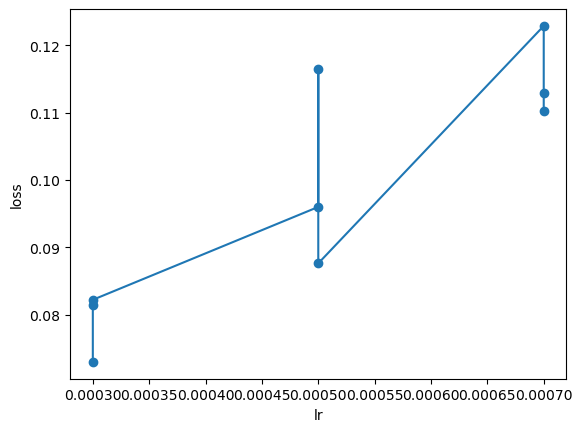

In [7]:
dv.visualize_data("lr")